<a href="https://colab.research.google.com/github/jkkbuddika/CellCounter/blob/master/ObjectCounter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Genotype: wt
Number of images to quantify: 2


Saving 34667-4_Processed001.tif to 34667-4_Processed001 (16).tif
File name: 34667-4_Processed001.tif


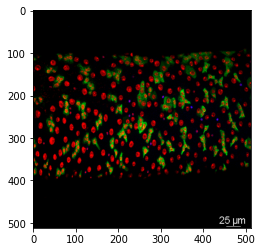

Lowest intensity: 15


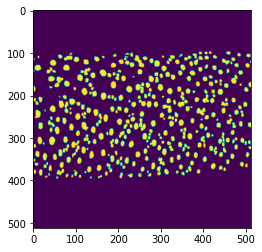

There are 349 objects in the image.
Lowest intensity: 15


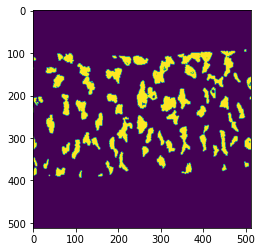

There are 71 objects in the image.


KeyboardInterrupt: ignored

In [16]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

object_count = dict()
image_list = []

#### Object Counter Class
class ObjectCounter:
    
    def count(self):
        genotype = input('Genotype: ') 
        nImages = input('Number of images to quantify: ')
        a = 0

        while a < int(nImages):
          uploaded = files.upload()
          fileName = input('File name: ')

          image_list.append(fileName)

          img = cv2.imread(fileName)
          plt.imshow(img)
          plt.show()

          b,g,r = cv2.split(img)

          colors = ['Blue', 'Green', 'Red']
          channels = [b, g, r]
          x = 0

          for i in channels:
            seed_pt = (20, 20)
            fill_color = 0
            mask = np.zeros_like(i)
            kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

            for th in range(15, 255):
              prev_mask = mask.copy()
              mask = cv2.threshold(i, th, 255, cv2.THRESH_BINARY)[1]
              mask = cv2.floodFill(mask, None, seed_pt, fill_color)[1]
              mask = cv2.bitwise_or(mask, prev_mask)
              mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

            plt.imshow(mask)
            plt.show()

            n_centers = cv2.connectedComponents(mask)[0] - 1
            print('There are ' + str(n_centers) + ' objects in the image.')

            if colors[x] in object_count:
              object_count[colors[x]].append(n_centers)
            
            else:
              object_count[colors[x]] = [n_centers]
            
            x = x + 1
          
          df1 = pd.DataFrame(image_list,columns=['File Name'])         
          df2 = pd.DataFrame.from_dict(object_count)

          a = a + 1
        
        # Save the final counting data
        data = pd.concat([df1, df2], axis=1)
        print(data)
        data.to_csv(input('Output .csv File Name: '))

## Main Function 
countObj = ObjectCounter()
countObj.count()